<a href="https://colab.research.google.com/github/Brites101/study-cases/blob/master/Brites_Data_Science_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#general porpuse Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#question 2a
from scipy.spatial import distance
#question 2b
from sklearn.cluster import KMeans
#Question 4
from random import seed
seed(1)
from random import randrange
#Question 5a
np.random.seed(0)
from sklearn.model_selection import train_test_split
#Question 5b
from sklearn.linear_model import LinearRegression
#Question 5c
from sklearn.linear_model import Ridge, RidgeCV
#Question 5d
from sklearn.linear_model import Lasso, LassoCV
#Question 5e
from sklearn.metrics import r2_score
#question 7a
import scipy.cluster.hierarchy as sch
#question 7b
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
#question 7c
from sklearn.preprocessing import StandardScaler
#question 7d
!pip install geopandas
import geopandas

     |████████████████████████████████| 972kB 5.2MB/s 
     |████████████████████████████████| 14.8MB 302kB/s 
     |████████████████████████████████| 6.5MB 37.2MB/s 



---

# Question 1

You will now think of some real-life applications for statistical learning.


---


<h2><center>BEFORE WE START</center></h2>


To clarify the examples in this question it is good to talk about the difference between **inference** and **prediction**.

Inference describes the process of infering how the output is generated as a function of a given dataset. It usually accompanies interpretation of different parameters used within a model, before any prediction is outputed and it is used to decisions beyond that given observation's prediction.

Prediction describes simply the final result that the model outputs. It usually is more focused on getting the a correct value most of the, regardless of the parameter. The focus is getting the corretly output consistently. Any blackbox model, for example, is focused on providing good predictions, even if they dont provide any meaningful insights on how variables are interacting with the response.

**Example:** Using the date and geographic point in the surface of the planet, we can use a model to:
1. **Infer** how a given scenario affects the likelyhood of raining.
2. Generate a **prediction** in the set `{'will rain', 'will not rain'}`

---



##a) Describe three real-life applications in which classification might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer

**Application 1 -** A hospital can build a classifier to assign if a new arrival should be send straight to the COVID-19 ICU or not, without a Medical Doctor having to conduct examinations. The predictors in this model could be based on life signs measurements, recent lab exams, demographic information and comorbidities, while the response would the decision of sending the patient to the COVID-19 ICU or not.

For this classifier, the goal is a prediction, since the model will be used to directly make a decision regarding the patient next step.

---
**Application 2 -** A video platform can use a classifier to identify if a new video entry in kid-friendly or not, so it can display ads properly and avoid reccommending certain content to underage people. The predictors in models could be the video author, title, a transcription of the video script and the occurance of inadequate content in each given frame. The response would be a flag, tagging the video as kid-friendly or not for usage in filters and other models.

In this classifier the goal is a prediction. Our focus in on accurately assigning to flag to any given video.

---
**Application 3 -** A Tourism Agency sale team can build a classifier to analyze a given new lead's preferences and suggest a travel option that fits that potential customer's wishes. The predictors would be the time of the year, the person's preferences regarding regions, culture and activities and every countries' travel restrictions. The response of this model would a travel package.

In this model the main goal is an inference, since we are looking to guide the customer's decision and understand how their preferences broadens or restricts their travel options. A single final response is not the main goal.

## b) Describe three real-life applications in which regression might be useful. Describe the response, as well as the predictors. Is the goal of each application inference or prediction? Explain your answer.

**Application 1 -** I can build a regression to understand how housing is priced in a given city. Some of the predictors would be metrics such as the number of rooms, number of bathrooms, total area, distance from the city center, if there are schools close by and so on. The response would be a price estimative.

In this case, the goal would be inference, because i would be mostly concerned on understanding how these factor affect price, to better prioritize these feature and understading what type of housing should i reasonabily be looking for.

**Application 2 -** A company can use a regression to dinamically price it's products/services in an application based on time of day, number of customers at that time and availability.

For this example, to goal would be a prediction, since we are focused on outputting a adequate price for the transaction, regardless of how the predictors are interacting in a given instant.

**Application 3 -** The producers of a long-running TV show can use a regression to predict the Net Promoter Score of a given episode, using predictors such as general theme of the episode, each character's screen time, specific character interactions, the writers and directors involved and so on.

For this regression, the goal would be inference, since we wish to use this model to better tailor future episodes, rather than correctly predicting their NPS.

## c) Describe three real-life applications in which cluster analysis might be useful.

**Application 1 -** We can build a cluster analysis that aggregates similar music tracks, based on the instruments used in the music, a bag of words of the lyrics, where and when it was performed. This could be used to identify genre or propose to which playlist a given music must be added.

---


**Application 2 -** We can use a cluster analysis to group all stores from a global retail company and identify how to support their performance, using criterias such as operation performance,organizational health, and current store goals. This way you can develop different growth strategies for each clusters, instead of individual strategies or a single strategy to everyone.

---


**Application 3 -** We can clusters the leads in the CRM of a company based on geographic location, purchase history and demographic information to help a marketing team to develop the personas that will be used in their marketing and content development strategy.


---

# Question 2

The table below provides a training data set containing six observations, three predictors,
and one qualitative response variable.

In [ ]:
q2_df = pd.DataFrame(data = {'Obs':[1,2,3,4,5,6],
                             'X1':[0,4,0,0,-2,1],
                             'X2':[3,0,-1,1,0,1],
                             'X3':[0,0,4,2,1,3],
                             'Y':['Red','Green','Red','Green','Red','Red']})

q2_df

,Obs,X1,X2,X3,Y
0,1,0,3,0,Red
1,2,4,0,0,Green
2,3,0,-1,4,Red
3,4,0,1,2,Green
4,5,-2,0,1,Red
5,6,1,1,3,Red


Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using Knearest neighbors.

## a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [ ]:
X = q2_df[['X1','X2','X3']]
y = q2_df['Y']

In [ ]:
def q2_distance(X,index,test):
  '''get the coordinates of a given row in the X DataFrame and calculate its 
  distance from a given test point. X and test must have the number of dimensions'''

  target = tuple(X.loc[X.index == index].values.flatten())
  dist = distance.euclidean(test,target)
  return dist

test_point = (0,0,0)
for i in X.index:
  print('the distance between the test_point and the target point (Obs.{}) is {} units'.format(q2_df.iloc[i,0], q2_distance(X,i,test_point)))

the distance between the test_point and the target point (Obs.1) is 3.0 units
the distance between the test_point and the target point (Obs.2) is 4.0 units
the distance between the test_point and the target point (Obs.3) is 4.123105625617661 units
the distance between the test_point and the target point (Obs.4) is 2.23606797749979 units
the distance between the test_point and the target point (Obs.5) is 2.23606797749979 units
the distance between the test_point and the target point (Obs.6) is 3.3166247903554 units


## b) What is our prediction with K = 1? Why?

In [ ]:
class PredictedCluster:
  def __init__(self, predicted_cluster, neighbors_index,neighbors_dist,neighbors_clusters):
    self.predicted_cluster = predicted_cluster
    self.neighbors_index = neighbors_index    
    self.neighbors_dist = neighbors_dist
    self.neighbors_clusters = neighbors_clusters

def predict_cluster(test_tuple,K, X, y):
  
  #Calculate distances and input them in aux DataFrame
  aux = pd.DataFrame(columns=['target_index','distance_to_test'])
  for i in X.index:
    aux.loc[len(aux)] = [i,q2_distance(X,i,test_point)]

  #sort aux DataFrame and untie distances
  aux = aux.sort_values('distance_to_test').reset_index(drop=True)
  
  #list neighbours feature
  knn_index = aux.iloc[0:K]['target_index'].tolist()
  knn_distance = aux.iloc[0:K]['distance_to_test'].tolist()
  knn_cluster = [y.to_dict()[n] for n in knn_index]

  #count neighbours clusters and outputs most recurring cluster
  prediction=knn_cluster[0]
  counter = 0
  for c in knn_cluster: 
          freq = knn_cluster.count(c) 
          if(freq> counter): 
              counter = freq 
              prediction = c

  #create PredictedCluster object for this observation
  predicted_cluster = PredictedCluster(prediction,knn_index,knn_distance,knn_cluster)

  return predicted_cluster

In [ ]:
k1 = predict_cluster((0,0,0),3, X, y)
k1.predicted_cluster

'Red'

The prediction for `K=1` is particularly interesting in this case because there is no unique closest neighbour to `(0,0,0)`. `Obs.4` and `Obs.5` are equidistant from it.

**Dealing with ties in KNN** can be done in many different way. In the function above, the untie happens during sorting, based on numpy's `quicksort`  method (which is somewhat affect by order of observations) for no particular reason. This resulted in `(0,0,0)` being assigned the color `Red`

Some ways that you could also deal with a given tie is:

* By randomly assigning a cluster to the `test_point`,
* By using k nearest means/median to get a secundary border,
* (in situations with `K>1`) By reducing `K` until you have untied the prediction.

Ideally one could use their own understading of the problem and the data to allocate the tied test_point accordingly. But the difference between those methods is rarely relevant for the overall performance of the model.



## c) What is our prediction with K = 3? Why?

In [ ]:
k3 = predict_cluster((0,0,0),3, X, y)

k3.predicted_cluster

'Red'

In [ ]:
k3.neighbors_clusters

['Green', 'Red', 'Red']

For `K=3`, the predicted color is `Red`, since out of its `K` closest neighbours, `K-1` are `Red`.

## d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?



The goal of the model we used in this exercise is to approximate the approximate the best Decision Boundary with the evidence we have evidence. The decision boundery are defined by the hyperplanes dividing the feature space into our clusters. The following image is an example of a decision boundary, dividing a 2D feature space into two clusters.

<center><img src="https://i.imgur.com/t1sKfPu.jpg" width="400"/></center>

A highly nonlinear boundary usually describes level of specificity with cannot be resonabily expected from our model. akin to overfitting a model, this usually indicates that our model will not generalize well.

To reduce this issue, we must **increase the value of K**. Increasing K gives each observation a higher sample to compare, hence reducing variance in the output and providing a smoother decision boundary.

<center><img src="https://i.imgur.com/l3z5qLI.jpg" width="1000"></center>


---

# QUESTION 3

Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ, X3 = Gender (1 for
Female and 0 for Male), X4 = Interaction between GPA and IQ, and X5 = Interaction between
GPA and Gender. The response is starting salary after graduation (in thousands of dollars).
Suppose we use least squares to fit the model, and get
* $β_0 = 50$,
* $β_1 = 20$,
* $β_2 = 0.07$,
* $β_3 = 35$,
* $β_4 = 0.01$,
* $β_5 = −10$

<div class="alert alert-block alert-warning">
<b>NOTE:</b> for this exercise i am suposing that "interaction" between two numbers means their product. e.g. "Interaction between A and B" means $A \cdot  B$
<h3><center>$y =\beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4(x_1x_2) + \beta_5(x_1x_3) $ </center></h3>
</div>


## a) Which answer is correct, and why?


1. For a fixed value of IQ and GPA, males earn more on average than females.
2. For a fixed value of IQ and GPA, females earn more on average than males.
3. For a fixed value of IQ and GPA, males earn more on average than females
provided that the GPA is high enough.
4. For a fixed value of IQ and GPA, females earn more on average than males
provided that the GPA is high enough.


**ANSWER:**

given the fit model: 

<h3><center>$y = 50 + 20x_1 + 0.07x_2+ 35x_3 + 0.01(x_1x_2) - 10(x_1x_3) $ </center></h3>

we get that:

<h3><center>
(i) $y(x_3=0) = 50 + 20x_1 + 0.07x_2 + 0.01(x_1x_2)$ </center></h3>
<h3><center>(ii) $y(x_3=1) = 85 + 20x_1 + 0.07x_2 + 0.01(x_1x_2) - 10(x_1)$ </center></h3>

Given fixed values for $X_1$ and $X_2$, we can reduced these equations to:
<h3><center>
(i) $y(x_3=0) = C$ </center></h3>
<h3><center>(ii) $y(x_3=1) =-10(x_1)+ 35 + C$ </center></h3>
Where C is a fixed value.


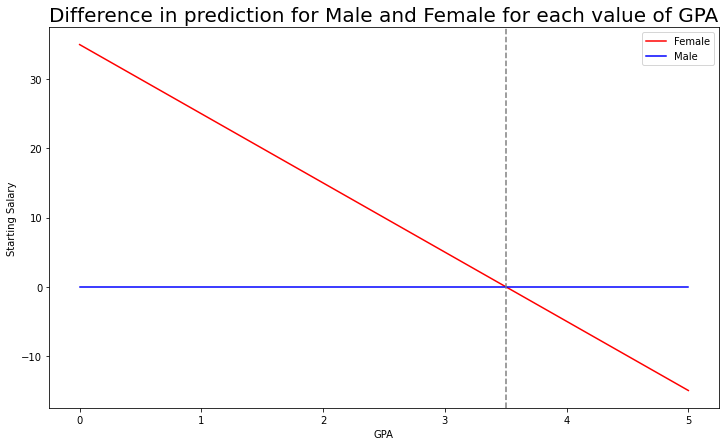

In [ ]:
x = np.linspace(0,5,100)
y1 = -10*x+35
y0 = 0*x

plt.figure(figsize=(12, 7))
plt.plot(x, y1, '-r', label='Female')
plt.plot(x, y0, '-b', label='Male')
plt.axvline(x=3.5,color='grey',linestyle='--')
plt.title('Difference in prediction for Male and Female for each value of GPA',fontsize=20)
plt.xlabel('GPA')
plt.ylabel('Starting Salary')
plt.legend(loc='upper right')

We can clearly see that:

<h2><center>$x_1 > 3.5 \implies y(x_3=0)>y(x_3=1)$</center></h2>

Therefore, the correct answer is option 3 which states:

> "*For a fixed value of IQ and GPA, males earn more on average than femalesprovided that the GPA is high enough*."

## b) Predict the salary of a female with IQ of 110 and a GPA of 4.0

In [ ]:
def q3_predict(x1,x2,x3):
  y= 50+(20*x1)+(0.07*x2)+(35*x3)+(0.01*x1*x2)+(-10*x1*x3)
  return y

In [ ]:
q3_predict(4,110,1)

137.1

## c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer.


*ANSWER: FALSE*

That is not necessarely true. The coefficient for the GPA/IQ interaction does not indicate how reliable that evidence is. It indicates the degree of change that a variable (GPA*IQ) in the outcome variable (Starting Salary).

To measure how reliable that evidence is, one should examine the statistical significance through the coefficient's p-value and a given confidence level.


---

# QUESTION 04

We now review k-fold cross-validation

## a) Explain how k-fold cross-validation is implemented.

Cross-validation is a statistical method used to estimate the performance of a model via resampling. k-fold cross-validation gives a solid performance estimative when compared to other methods such as the train and test split.

The method works by dividing the dataset into K sets of equal size (and one set of `N%K` elements) caled folds.

In [237]:
def cross_validation_split(data, folds):
	data_split = list()
	data_list = list(dataset)
	fold_size = int(len(dataset) / folds)
	for i in range(folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(data_list))
			fold.append(data_list.pop(index))
		data_split.append(fold)
	return data_split

dataset = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
folds = cross_validation_split(dataset, 3)
print('With a dataset of {} observations and {} folds. our folds are {}'.format(len(dataset),3,folds))

With a dataset of 10 observations and 3 folds. our folds are [[[7], [4], [9]], [[8], [1], [10]], [[3], [5], [6]]]


After defining the folds, we would train a given model using k-1 folds, and use the remaining fold for validation, so we can calculate performance.

We repeat this process K times, with a different validation fold at each iteration.

Now, we have a difference performance for each iteration. An average of this performances yields a good generalization of our model performance.

<center><img src="https://i.imgur.com/dOo1rQL.jpg" width="500"/></center>

## b) What are the advantages and disadvantages of k-fold cross-validation relative to:

### 1.The validation set approach?


A validation set approach is akin to a K-fold Cross-Validation where `K=1`. Which is the more common train-test-split approach.

Some **advantages** of K-fold Cross-Validation relative to Validation Set Approach are:

*   It assess the performance of your model multiple times, reducing the effects that any single split may have on the model and better showing how the model generalizes to unknown data.
*   It has lower bias due to bigger training set for each iteration
*   Cross-Validation can help with Hyperparameter tuning

Some **disadvantages** ares:
*   It is more computationaly intensive, due train model multiple times with a bigger training set
*   It is not easily implemented in time-series or sequential data.
*   K-Fold requires more care (ensuring the data is well distributed across folds and and checking how big is the performance variance across folds.

### 2.LOOCV?

A Leave One Out Cross-Validation (LOOCV) the on the other end of the spectrum for the validation set, in which you perform a K-fold where `K=N`. Which means we train our model with almost all the observations, leaving a single one out, which will be used to validate the model. At the end, instead of getting the mean of the performances on each observation, we compute the uncertainty in the model

Some **advantages** of K-fold Cross-Validation over LOOCV are:

*  Requires less resources. LOOCV is exponentially time and computationally intensive as the dataset grow.
*  It has lower variance, due smaller training set

Some **disadvantages**
*  It has more bias than LOOCV
*  I has randomness, while LOOCV does not.

When choosing which type of validation procedure you will use, the most important aspect to consider is the training set size and the training time. As a rule of thumb, running K-fold CV with 5 to 10 folds is a good default.


---

# QUESTION 5

In this exercise, we will predict the number of applications received using the other variables in the [College data set](https://github.com/cervejaria-ambev/ambev_estudos_ISL/blob/master/data/raw/college.csv)

In [55]:
q5_df = pd.read_csv('https://raw.githubusercontent.com/cervejaria-ambev/ambev_estudos_ISL/master/data/raw/college.csv')

## a) Split the data set into a training set and a test set.

In [56]:
q5_df.rename(columns={'Unnamed: 0':'College'},inplace=True)
q5_df['Private'] = q5_df['Private'].map({'Yes':1,'No':0})
q5_df.set_index('College',inplace=True)

In [57]:
y = q5_df['Apps']

X = q5_df[['Private',
           'Accept',
           'Enroll',
           'Top10perc',
           'Top25perc',
           'F.Undergrad',
           'P.Undergrad',
           'Outstate',
           'Room.Board',
           'Books',
           'Personal',
           'PhD',
           'Terminal',
           'S.F.Ratio',
           'perc.alumni',
           'Expend',
           'Grad.Rate']]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [59]:
q5b_reg = LinearRegression(normalize=True)
q5b_reg.fit(X_train, y_train)

y_pred_b = q5b_reg.predict(X_test)

test_error_b = ((y_test - y_pred_b)**2).mean()
print('The MSE for the linear regression is {}'.format(test_error_b))

The MSE for the linear regression is 1934106.0085524342


## c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [60]:
alpha_arr = 10**np.linspace(10,-2,100)*0.5

ridgecv = RidgeCV(alphas = alpha_arr,cv=10 ,scoring = 'neg_mean_squared_error',normalize=True)
ridgecv.fit(X_train, y_train)
print('the best λ found via crossvalidation is {}'.format(ridgecv.alpha_))

the best λ found via crossvalidation is 0.005


In [61]:
q5c_reg = Ridge(alpha=ridgecv.alpha_, normalize=True)
q5c_reg.fit(X_train, y_train)

y_pred_c = q5c_reg.predict(X_test)

test_error_c = ((y_test - y_pred_c)**2).mean()
print('The MSE for the ridge regression is {}'.format(test_error_c))

The MSE for the ridge regression is 2046569.0095866467


## d) Fit a lasso model on the training  set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates

In [62]:
lassocv = LassoCV(alphas = alpha_arr,cv = 10, max_iter = 1000, normalize = True)
lassocv.fit(X_train, y_train)
print('the best λ found via crossvalidation is {}'.format(lassocv.alpha_))

the best λ found via crossvalidation is 0.7599555414764666


In [63]:
q5d_reg = Lasso(alpha=lassocv.alpha_,max_iter = 1000, normalize = True)
q5d_reg.fit(X_train, y_train)

y_pred_d = q5d_reg.predict(X_test)

test_error_d = ((y_test - y_pred_d)**2).mean()
print('The MSE for the lasso regression is {}'.format(test_error_d))

The MSE for the lasso regression is 2125693.0655860347


In [64]:
q5d_coef = pd.Series(q5d_reg.coef_, index=X.columns,name='Lasso_Coeficients')
q5d_coef[q5d_coef!=0].sort_values()

Private       -374.996663
perc.alumni     -9.260176
Terminal        -5.167420
PhD             -1.282883
Top25perc       -0.512699
Outstate        -0.026205
P.Undergrad      0.028232
Books            0.032209
F.Undergrad      0.040226
Personal         0.057132
Expend           0.082200
Room.Board       0.137292
Accept           1.213224
S.F.Ratio        3.742635
Grad.Rate        5.258816
Top10perc       24.099235
Name: Lasso_Coeficients, dtype: float64

## e) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these approaches?


In [65]:
print('''The MSE for the linear regression is {} 
The MSE for the ridge regression is {} 
The MSE for the lasso regression is {}'''.format(test_error_b,test_error_c,test_error_d))

The MSE for the linear regression is 1934106.0085524342 
The MSE for the ridge regression is 2046569.0095866467 
The MSE for the lasso regression is 2125693.0655860347


We can see very slight changes in the Mean Squared Error for each of these models. We do not see a relevant change in these values across each model.

If we want to check how well each model can predict the number of college applications, would be better to compare their **adjusted R2 score**. Which will give us an idea of how many data points fall within the regression line.

In [73]:
r2_linear = r2_score(y_test, y_pred_b)
r2_ridge = r2_score(y_test, y_pred_c)
r2_lasso = r2_score(y_test, y_pred_d)

def adjusted_r2(r2score,X_train):
  '''Calculetes adjusted R2 for a given r2 score and training set'''
  adjustedr2 = 1 - (((1-r2score)*(X_train.shape[0]-1))/ (X_train.shape[0] - X.shape[1]- 1))
  return adjustedr2

adjusted_r2_linear = adjusted_r2(r2_linear,X_train)
adjusted_r2_ridge = adjusted_r2(r2_ridge,X_train)
adjusted_r2_lasso = adjusted_r2(r2_lasso,X_train)

print('''The Adjusted R² Score for the linear regression is {} 
The Adjusted R² Score for the ridge regression is {} 
The Adjusted R² Score for the lasso regression is {}'''.format(adjusted_r2_linear,adjusted_r2_ridge,adjusted_r2_lasso))


The Adjusted R² Score for the linear regression is 0.9059619499837186 
The Adjusted R² Score for the ridge regression is 0.900493893284928 
The Adjusted R² Score for the lasso regression is 0.8966468073947753


As we can see above, these three model have a rather high Adjusted R2 Score, which leads me to conclude that the input variables are describing the our target variable very well. Given that the Adjusted R² is decreasing, we may conclude that the regularization penalty is reducing the coefficients of variable that are actually helping explaing the target variable.


---
# QUESTION 6

Suppose we produce ten bootstrapped samples from a data set containing red and green
classes. We then apply a classification tree to each bootstrapped sample and, for a specific
value of X, produce 10 estimates of 𝑃 (𝑐𝑙𝑎𝑠𝑠 𝑖𝑠 𝑟𝑒𝑑 | 𝑋): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75

![Figure 1: A partition of the predictor space and a decision tree](https://i.imgur.com/2dWJqH3.png)


There are two common ways to combine these results together into a single class prediction.
One is the majority vote approach. The second approach is to classify based on the average
probability. In this example, what is the final classification under each of these two
approaches?


Since there are only two possible classification (Green or Red), we know that P(red) = 1 - P(green).

Therefore, in this case, we will classify the observation X as red when the combined 𝑃(𝑐𝑙𝑎𝑠𝑠 𝑖𝑠 𝑟𝑒𝑑 | 𝑋) > 0.5.

In [244]:
P_red_given_x = pd.Series([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])

In [268]:
def get_classification(mode, p_series):
  if mode == 'Majority':
    if ((p_series > 0.5).sum() > len(p_series)/2) == True:
      out= 'Red'
    else:
      out='Green'
  elif mode == 'Average':
    if (p_series.mean() > 0.5) == True:
      out= 'Red'
    else:
      out='Green'  
  else:
    raise Exception('mode is not recognized, use "Majority" or "Average"')
  return out

Majority vote consists in getting the most recurring classification across our samples. The check below returns `True`, which means that the classification is `Red`

In [269]:
get_classification('Majority',P_red_given_x)

'Red'

Average probability means getting and expected probability by taking the average value of the probability of our samples. The check below returns `False`, which means that the classification is `Green`

In [270]:
get_classification('Average',P_red_given_x)

'Green'


---
#QUESTION 7

Consider the [`USArrests`](https://forge.scilab.org/index.php/p/rdataset/source/tree/master/csv/datasets/USArrests.csv) data. We will now perform hierarchical clustering on the states.

## a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

In [ ]:
q7_df = pd.read_csv('https://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/datasets/USArrests.csv')
q7_df.rename(columns={'Unnamed: 0':'State'},inplace=True)
q7_df['State'] = q7_df['State'].str.upper()
q7_df.sample(5)

,State,Murder,Assault,UrbanPop,Rape
42,TEXAS,12.7,201,80,25.5
43,UTAH,3.2,120,80,22.9
45,VIRGINIA,8.5,156,63,20.7
23,MISSISSIPPI,16.1,259,44,17.1
30,NEW MEXICO,11.4,285,70,32.1


In [ ]:
q7_X = q7_df.iloc[:,1:]

hc = AgglomerativeClustering(n_clusters = 50, affinity = 'euclidean', linkage = 'complete')
y = hc.fit_predict(q7_X)

clustered_df = pd.DataFrame(data = {'State':q7_df['State'],'Cluster_n50':y})

## b) Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [ ]:
linkage = sch.linkage(q7_X,metric='euclidean', method = 'complete')

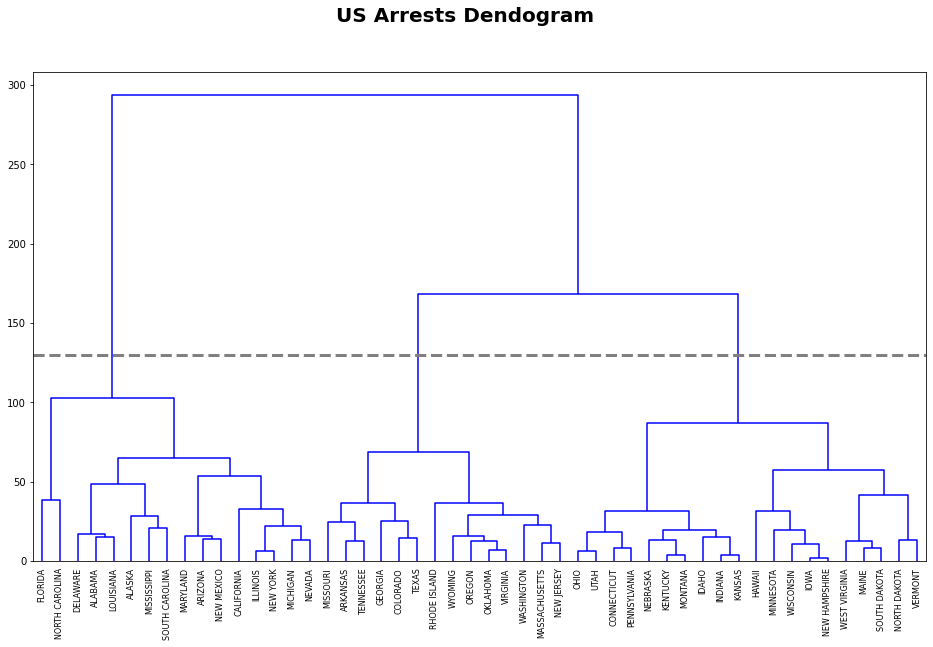

In [ ]:
#Plot Dendogram
fig, axs = plt.subplots(figsize = (16,9),facecolor='w')
fig.suptitle('US Arrests Dendogram',fontsize = 20, fontweight='bold')
dendrogram = sch.dendrogram(linkage,ax=axs,color_threshold=0)

#replace indexes for states in X axis labels
labels = [item.get_text() for item in axs.get_xticklabels()]
states_map = q7_df['State'].to_dict()
axs.set_xticklabels([states_map[int(k)] for k in labels])

#cut dendogram at three clusters
axs.axhline(y=130, color='grey', linestyle='--',linewidth=3);

In [ ]:
fl = fcluster(linkage,3,criterion='maxclust')
clustered_df['Cluster_n3'] = fl
clustered_df

,State,Cluster_n50,Cluster_n3
0,ALABAMA,30,1
1,ALASKA,37,1
2,ARIZONA,33,1
3,ARKANSAS,38,2
4,CALIFORNIA,29,1
5,COLORADO,32,2
6,CONNECTICUT,43,3
7,DELAWARE,27,1
8,FLORIDA,47,1
9,GEORGIA,39,2


## c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [ ]:
q7c_X = q7_X.copy()

scaled = StandardScaler().fit_transform(q7c_X)
q7c_X = pd.DataFrame(scaled, columns = q7c_X.columns)

q7c_X.std(ddof=0)

Murder      1.0
Assault     1.0
UrbanPop    1.0
Rape        1.0
dtype: float64

In [ ]:
linkage_scld = sch.linkage(q7c_X,metric='euclidean', method = 'complete')
fl_scld = fcluster(linkage_scld,3,criterion='maxclust')

clustered_df['Cluster_n3_scaled'] = fl_scld

clustered_df

,State,Cluster_n50,Cluster_n3,Cluster_n3_scaled
0,ALABAMA,30,1,3
1,ALASKA,37,1,3
2,ARIZONA,33,1,2
3,ARKANSAS,38,2,1
4,CALIFORNIA,29,1,2
5,COLORADO,32,2,2
6,CONNECTICUT,43,3,1
7,DELAWARE,27,1,1
8,FLORIDA,47,1,2
9,GEORGIA,39,2,3


## d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

We can clearly see in fig 1 and fig 2 that scaling the features have affected the Dendogram and the final clustering. We can see that the interval to acquire three clusters, for example became very slim after the standardization. Also, the height of our dendogram greatly decreased after scaling.

In general principle, clustering algorithms are distance-based, which means that changes in the measurement units used in any given features will affect the final output. If all feature are to be taken into consideration equally, they should be standardized in some form.

The image below shows how a change in measurement unit can distort the feature space and produce different distances.

<center><img src="https://i.imgur.com/QMnv9NJ.png" width="500"/></center>

In this particular case, the first issues that would come to mind is the difference in population across states. If the `Murder`,`Assault` and `Rape` were not treated in someway, we would likely end up clusting states with similar population.

Looking at the given dataset, these three features seem to have been scaled in someone (likely divided by a certain number of habitants). Meanwhile `UrbanPop` seens to be the percentage of people from that state living in Urban Area, which is a completly different metric from the other feature. Which makes stardardization necessary in my opinion

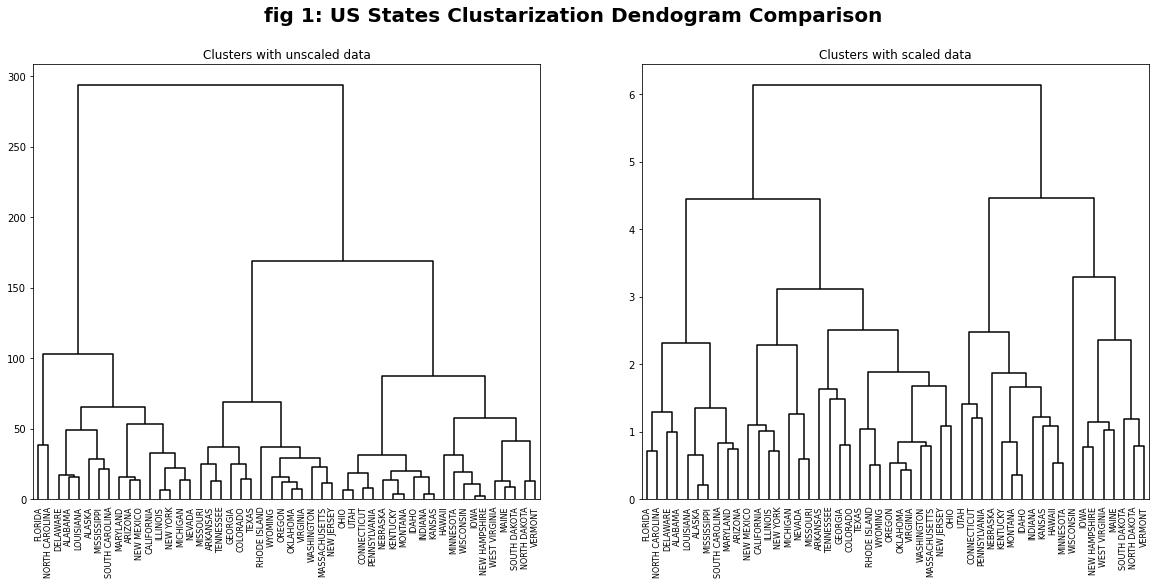

In [ ]:
#PLOT FIG 1
fig, axs = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('fig 1: US States Clustarization Dendogram Comparison',fontsize = 20, fontweight='bold')

axs[0].set_title('Clusters with unscaled data')
unscaled_dendogram = sch.dendrogram(linkage,ax=axs[0],color_threshold=0, link_color_func=lambda x: "#000000")
axs[0].set_xticklabels([states_map[int(k)] for k in labels])

axs[1].set_title('Clusters with scaled data')
scaled_dendogram = sch.dendrogram(linkage_scld,ax=axs[1],color_threshold=0,link_color_func=lambda x: "#000000")
axs[1].set_xticklabels([states_map[int(k)] for k in labels]);

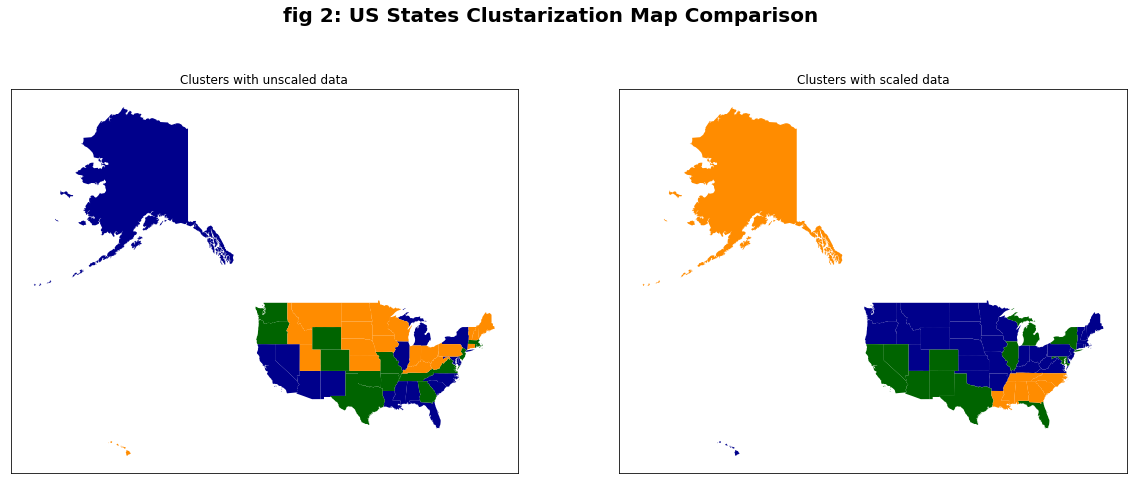

In [ ]:
#PLOT FIG 2
states = geopandas.read_file('https://opendata.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e_0.geojson')
states = states.to_crs("EPSG:3395")
cluster_colors = ['darkblue','darkgreen','darkorange']

fig, axs = plt.subplots(1,2,figsize=(20,8))
fig.suptitle('fig 2: US States Clustarization Map Comparison',fontsize = 20, fontweight='bold')

#Plot 1 - Unscaled data
axs[0].set_title('Clusters with unscaled data')
for i in set(clustered_df['Cluster_n3']):
  states_in_cluster = list(clustered_df.loc[clustered_df['Cluster_n3']==i]['State'])
  states[states['State_Name'].isin(states_in_cluster)].plot(ax=axs[0],color=cluster_colors[i-1],legend=True)
axs[0].axes.xaxis.set_visible(False)
axs[0].axes.yaxis.set_visible(False)

#Plot 2 - Scaled data
axs[1].set_title('Clusters with scaled data')
for i in set(clustered_df['Cluster_n3_scaled']):
  states_in_cluster = list(clustered_df.loc[clustered_df['Cluster_n3_scaled']==i]['State'])
  states[states['State_Name'].isin(states_in_cluster)].plot(ax=axs[1],color=cluster_colors[i-1],label=i)
axs[1].axes.xaxis.set_visible(False)
axs[1].axes.yaxis.set_visible(False)